In [94]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from scipy import stats

In [95]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [96]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [97]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [98]:
# response['data']

# Fetching the data from API

In [99]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [100]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [101]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14005,YT,2022-11-06,5578,5
14006,YT,2022-11-07,5581,3
14007,YT,2022-11-08,5582,1
14008,YT,2022-11-09,5582,0


In [102]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [103]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13907,YT,2022-11-01,32,0
13908,YT,2022-11-02,32,0
13909,YT,2022-11-03,32,0
13910,YT,2022-11-04,32,0


In [104]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [105]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13781,YT,2022-11-13,0,0
13782,YT,2022-11-14,0,0
13783,YT,2022-11-15,0,0
13784,YT,2022-11-16,0,0


In [106]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [107]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [108]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
11866,SK,2022-04-08,131771,0,1252,0,354,0,0.950,NaN
11971,SK,2022-07-22,138968,0,1448,0,147,28,1.042,NaN
800,AB,2022-05-17,578652,546,4452,0,1225,0,0.769,0.000
4230,NB,2022-08-27,75152,712,466,4,33,12,0.620,0.562
6429,NT,2020-06-28,5,0,0,0,0,0,0.000,NaN
694,AB,2022-01-31,494308,2013,3579,13,1516,20,0.724,0.646
2998,MB,2022-04-23,140931,1466,1792,18,538,0,1.272,1.228
8444,ON,2021-08-20,559368,710,9333,1,199,18,1.668,0.141
7487,NU,2021-01-09,266,0,1,0,0,0,0.376,NaN
4187,NB,2022-07-15,69537,0,433,0,17,0,0.623,NaN


In [109]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [110]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [111]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [112]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [113]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6280,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9027,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7143,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6281,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9028,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [114]:
# Calculating active cases
covid_dataframe_df['Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
1791,BC,2022-01-13,293639,2251,2462,7,534,34,0.838,0.311,290643
10030,PE,2022-10-30,53561,0,69,0,10,0,0.129,0.000,53482
11094,QC,2023-02-20,1305046,361,18047,4,1289,0,1.383,1.108,1285710
3442,NB,2020-06-30,165,0,2,0,2,0,1.212,0.000,161
6201,NS,2022-08-31,62657,193,497,0,44,0,0.793,0.000,62116
10205,QC,2020-09-14,58352,286,5801,3,121,0,9.941,1.049,52430
11908,SK,2022-05-20,136482,0,1363,0,270,0,0.999,0.000,134849
7359,NU,2020-09-03,0,0,0,0,0,0,0.000,0.000,0
9365,PE,2021-01-03,96,0,0,0,0,0,0.000,0.000,96
6644,NT,2021-01-29,31,0,0,0,0,0,0.000,0.000,31


In [115]:
# Top 5 active cases 
Highest_active_province = covid_dataframe_df.groupby('Province').max()[['Active Cases', 'Date']].sort_values(['Active Cases'], ascending = False).reset_index()
Highest_active_province_df = Highest_active_province.set_index('Province')['Active Cases']
top_5_active_province = Highest_active_province_df.iloc[0:5]
top_5_active_province

Province
ON    1588656
QC    1301112
AB     624315
BC     392070
MB     152384
Name: Active Cases, dtype: int64

# Data Visualization 

In [116]:
# Descriptive Statistics 
covid_dataframe_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
count,1.050900e+04,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000,1.050900e+04
mean,1.331901e+05,296.465220,1717.538015,2.952517,206.873061,4.393187,1.215960,1.167732,1.312656e+05
std,2.838531e+05,1033.460529,3615.847280,10.149695,424.507299,18.327238,1.516647,7.090009,2.801427e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.150000e+02,0.000000,3.000000,0.000000,0.000000,0.000000,0.323000,0.000000,3.150000e+02
50%,5.899000e+03,5.000000,63.000000,0.000000,9.000000,0.000000,0.939000,0.000000,5.805000e+03
75%,1.268030e+05,178.000000,1571.000000,0.000000,236.000000,0.000000,1.413000,0.000000,1.242010e+05
max,1.605818e+06,19509.000000,18181.000000,153.000000,4190.000000,758.000000,11.679000,200.000000,1.588656e+06


In [117]:
covid_dataframe_df.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate', 'Active Cases'],
      dtype='object')

In [118]:
sorted_by_province = covid_dataframe_df.groupby('Province').agg({'Cumulative confirmed cases': 'mean', 'Cumulative death cases':'mean','Cumulative hospitalizations cases':'mean', 'Mortality rate':'mean', "Active Cases":'mean'})

sorted_by_province = sorted_by_province.rename(columns={"Cumulative confirmed cases": "Average confirmed cases", "Cumulative death cases": "Average death cases", "Cumulative hospitalizations cases":"Average hospitalization", "Mortality rate":"Average mortality rate", "Active Cases":"Average Active Cases"})
sorted_dataset=pd.DataFrame(sorted_by_province)

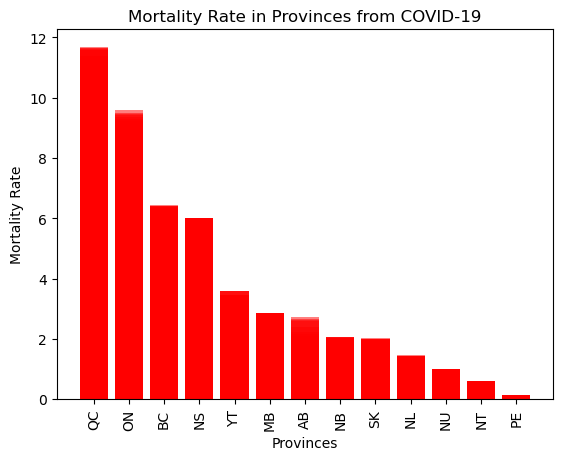

In [119]:
# Graph of mortality rate by province 

covid_dataframe_df = covid_dataframe_df.sort_values("Mortality rate",ascending = False)

x_value = covid_dataframe_df["Province"]
y_value=covid_dataframe_df["Mortality rate"]

plt.bar(x_value, y_value, color='red', alpha=0.5, align='center')
plt.xlabel("Provinces")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in Provinces from COVID-19")
plt.xticks(rotation="vertical")
plt.show()


Text(0.5, 1.0, 'COVID-19 cases by province')

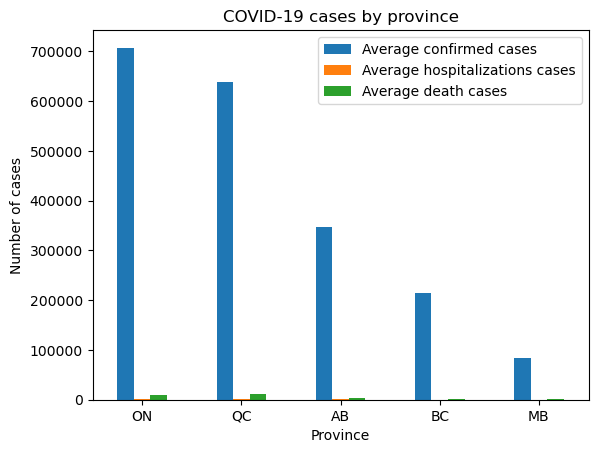

In [129]:
sorted_dataset = sorted_dataset.sort_values(by=['Average confirmed cases'], ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average confirmed cases')

data = pd.DataFrame({"Average confirmed cases": top_five["Average confirmed cases"],"Average hospitalizations cases": top_five["Average hospitalization"],"Average death cases": top_five["Average death cases"],}, index=top_five.index)

ax = data.plot(kind="bar", rot=0)

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("COVID-19 cases by province")

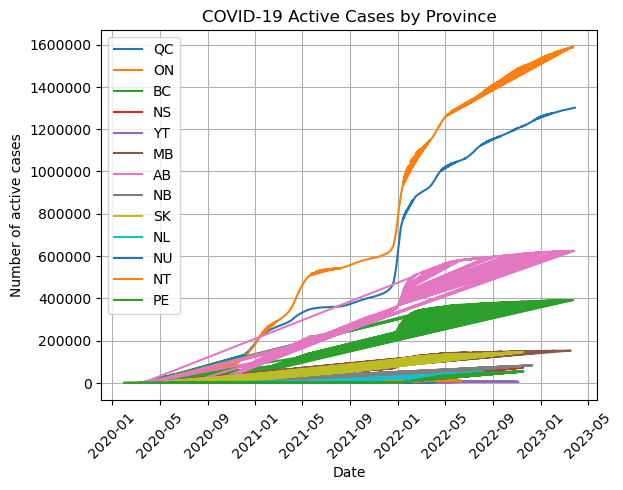

In [123]:

for province in covid_dataframe_df['Province'].unique():
    # Filter the data for the current province
    province_data = covid_dataframe_df[covid_dataframe_df['Province'] == province]
    
    # Create a line plot of active cases over time for the current province
    plt.plot(province_data['Date'], province_data['Active Cases'], label=province)

# Set the x-label, y-label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Number of active cases')
plt.title('COVID-19 Active Cases by Province')
plt.grid()

plt.xticks(rotation=45)
plt.yscale('linear')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))

plt.legend()

# Display the plot
plt.show()

In [125]:
covid_dataframe_df.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate', 'Active Cases'],
      dtype='object')

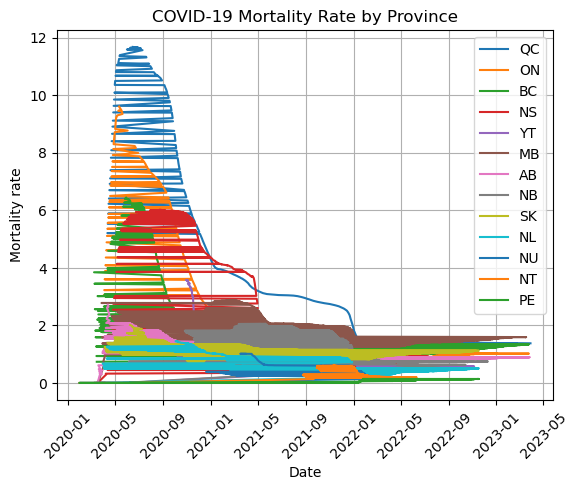

In [127]:
for province in covid_dataframe_df['Province'].unique():
    # Filter the data for the current province
    province_data = covid_dataframe_df[covid_dataframe_df['Province'] == province]
    
    # Create a line plot of mortality rate over time for the current province
    plt.plot(province_data['Date'], province_data['Mortality rate'], label=province)

# Set the x-label, y-label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Mortality rate')
plt.title('COVID-19 Mortality Rate by Province')
plt.grid()

plt.xticks(rotation=45)

plt.legend()

# Display the plot
plt.show()